# Predicting Medical Insurance costs — Machine Learning

Columns Description :
- Age: Age of primary beneficiary
- Sex: Primary beneficiary’s gender
- BMI: Body mass index (providing an understanding of the body, weights that are relatively high or low relative to height)
- Children: Number of children covered by health insurance / Number of dependents
- Smoker: Smoking (yes, no)
- Region: Beneficiary’s residential area in the US (northeast, southeast, southwest, northwest)
- Charges: Individual medical costs billed by health insuranc

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats 
import sklearn 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("Healthinsurance.csv")

In [3]:
df.describe()

,Age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.corr()

,Age,bmi,children,charges
Age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

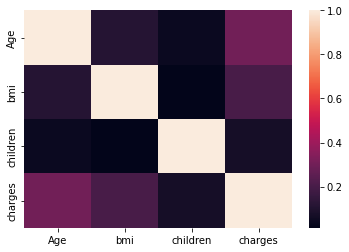

In [5]:
sns.heatmap(df.corr())

In [6]:
data = df.corr()
data.max()

Age         1.0
bmi         1.0
children    1.0
charges     1.0
dtype: float64

In [7]:
data.min()

Age         0.042469
bmi         0.012759
children    0.012759
charges     0.067998
dtype: float64

In [17]:
df.isnull().sum()

Age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['Age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.sample(5)

,Age,sex,bmi,children,smoker,region,charges
638,39,male,26.41,0,yes,northeast,20149.3229
160,42,female,26.60,0,yes,northwest,21348.7060
1305,24,female,27.72,0,no,southeast,2464.6188
1110,54,female,32.30,1,no,northeast,11512.4050
700,21,female,34.87,0,no,southeast,2020.5523


In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

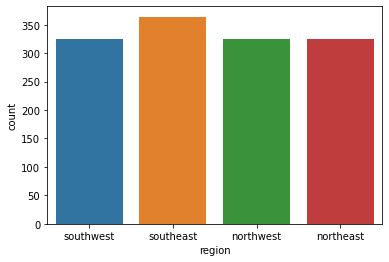

In [14]:
sns.countplot(df['region'])

In [16]:
data = df.groupby("sex")["smoker","charges"].max().reset_index()
data = data.sort_values('charges', ascending=True)
data = data[["sex","smoker","charges"]]
data = data.reset_index(drop=True)
data

C:\Users\sudes\AppData\Local\Temp/ipykernel_2260/2630668124.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby("sex")["smoker","charges"].max().reset_index()


,sex,smoker,charges
0,male,yes,62592.87309
1,female,yes,63770.42801


<AxesSubplot:xlabel='sex', ylabel='count'>

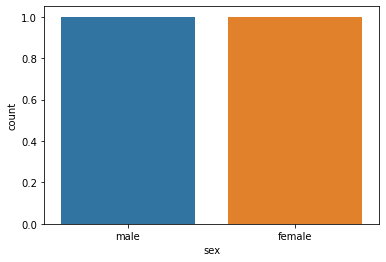

In [21]:
sns.countplot(data["sex"])

The male smoker paid the highest insurance amount to 62592 and female smoker paid the highest insurance amount to 63770.

In [18]:
df.skew()

C:\Users\sudes\AppData\Local\Temp/ipykernel_2260/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

C:\Users\sudes\AppData\Local\Temp/ipykernel_2260/4094823358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew())
C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

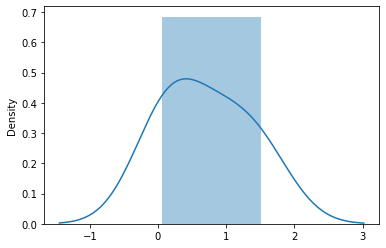

In [19]:
sns.distplot(df.skew())

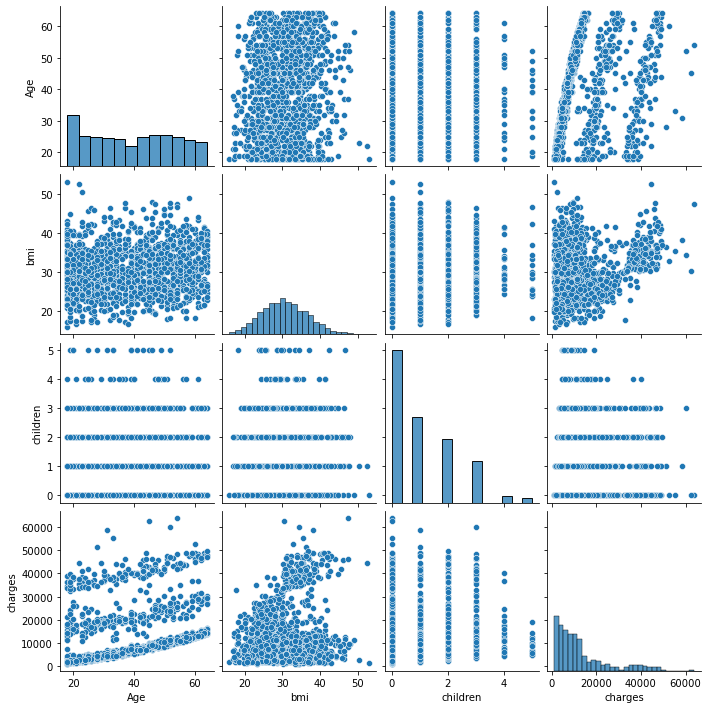

In [22]:
sns.pairplot(df)

In [24]:
from scipy.stats import zscore 
z = zscore(df['Age'])

Dataset is quite imbalanced and in different data types. StandardScaler technique will be applied here. 

In [32]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [36]:
df['smoker'] = le.fit_transform(df['smoker'])

In [37]:
df['region'] = le.fit_transform(df['region'])

In [38]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [49]:
st = StandardScaler()
x = st.fit_transform(x)

In [40]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size=.25, random_state = 45)

In [41]:
trainx.shape

(1003, 6)

In [42]:
testx.shape

(335, 6)

In [43]:
trainy.shape

(1003,)

In [44]:
testy.shape

(335,)

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

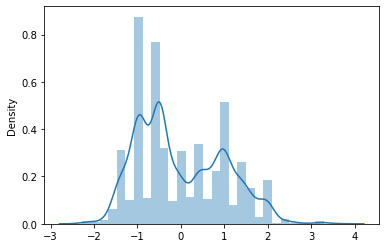

In [45]:
sns.distplot(trainx)

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

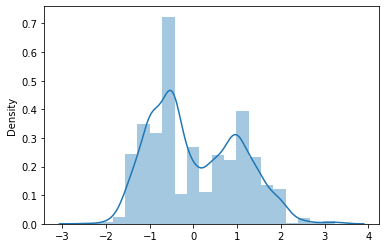

In [46]:
sns.distplot(testx)

<AxesSubplot:xlabel='charges', ylabel='Density'>

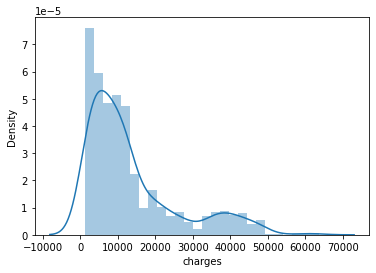

In [48]:
sns.distplot(trainy)

In [51]:
lr = LinearRegression()
lr.fit(trainx, trainy)

LinearRegression()

In [52]:
lr.score(trainx, trainy)

0.7623731125476765

In [54]:
pred = lr.predict(testx)

In [55]:
print("Mean absolute error: ", mean_absolute_error(testy, pred))
print("Mean squared error: ", mean_squared_error(testy, pred))
print("Coefficent of determination: ", r2_score(testy, pred))

Mean absolute error:  4394.477399391477
Mean squared error:  37721050.1117071
Coefficent of determination:  0.7063123569371986


C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

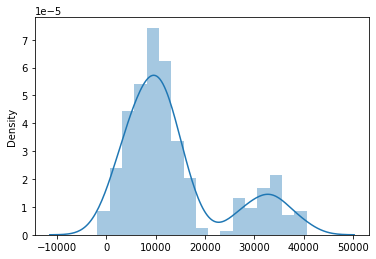

In [57]:
sns.distplot(pred)

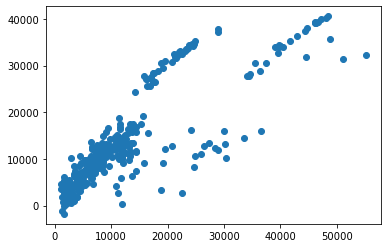

In [59]:
plt.scatter(testy, pred)

Applying SMOTE technique to make the imbalanced data - BALANCED and checking the model again.

In [60]:
from imblearn.over_sampling import SMOTE

Since the dataset is in continous numerical format, SMOTE technique can not be applied here. 